In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [2]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('Roman Catholic Church', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1535069107.0
2018-08-23 17:05:07
Catholic conference hears appeal for Church to welcome gay people
42
2
1514184702.0
2017-12-24 22:51:42
At Christmas Eve Mass, Pope Francis compares Mary and Joseph to modern migrants and refugees
1706
3
1511934210.0
2017-11-28 21:43:30
U.S. Catholic Bishops Issue Statement in Defense of Net Neutrality
799
4
1509150574.0
2017-10-27 17:29:34
The war against Pope Francis
20
5
1505959886.0
2017-09-20 19:11:26
Mormon Sect Leader Pleads Guilty of Food Stamp Fraud Scheme
207


In [3]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.535069e+09,2018-08-23 17:05:07,Catholic conference hears appeal for Church to...,42
1,1.514185e+09,2017-12-24 22:51:42,"At Christmas Eve Mass, Pope Francis compares M...",1706
2,1.511934e+09,2017-11-28 21:43:30,U.S. Catholic Bishops Issue Statement in Defen...,799
3,1.509151e+09,2017-10-27 17:29:34,The war against Pope Francis,20
4,1.505960e+09,2017-09-20 19:11:26,Mormon Sect Leader Pleads Guilty of Food Stamp...,207


In [4]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [5]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,1,1.514185e+09,2017-12-24 22:51:42,"At Christmas Eve Mass, Pope Francis compares M...",1706
1,2,1.511934e+09,2017-11-28 21:43:30,U.S. Catholic Bishops Issue Statement in Defen...,799
2,4,1.505960e+09,2017-09-20 19:11:26,Mormon Sect Leader Pleads Guilty of Food Stamp...,207


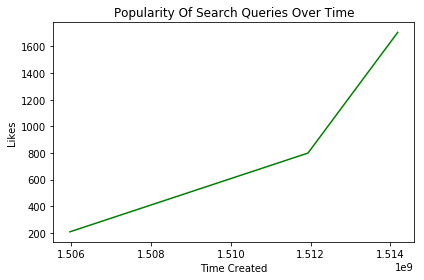

In [6]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()